In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Import Machine Learning Model
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [4]:
dataset = pd.read_csv('../Tugas/data_time_series.csv',index_col='tanggal')

In [5]:
dataset.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 01/01/2011 00:15 to 01/01/2015 00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [7]:
dataset.isna().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [8]:
dataset.dropna()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
tanggal,,,,,,,,,,,,,,,,,,,,,
01/01/2011 00:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/01/2011 00:30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/01/2011 00:45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/01/2011 01:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01/01/2011 01:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2014 23:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
31/12/2014 23:15,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525252,64.685315,72.043011,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
31/12/2014 23:30,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589315,670.087976,6864.864865


In [9]:
dataset.isna().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
k_means = KMeans(n_clusters=3)

In [12]:
k_means.fit(dataset)

KMeans(n_clusters=3)

In [13]:
x_label = k_means.labels_

In [14]:
print(x_label)

[0 0 0 ... 0 0 0]


In [15]:
k_means.predict(dataset)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
x = dataset.iloc[:,0]
y = dataset.iloc[:,1]

centroids = k_means.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

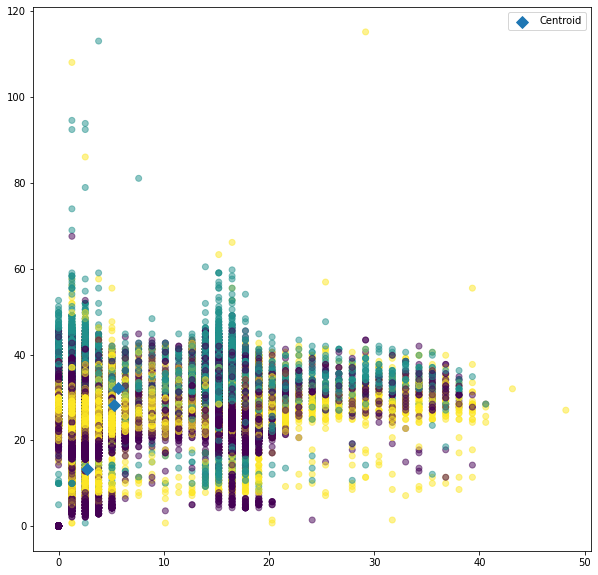

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,alpha=0.5,c=x_label)
plt.scatter(centroids_x,centroids_y,marker="D",s=70,label="Centroid")
# plt.xlabel("")
# plt.ylabel("")
plt.legend()
plt.show()

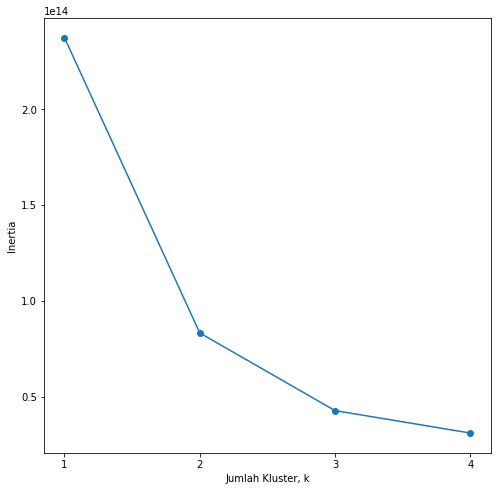

In [20]:
# Metode elbow
ks = range(1, 5)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(8,8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Kluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [22]:
merge_x = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(dataset)

In [23]:
merge_x[:,0]

array([ 37.748337,  32.207123,  31.834179, ..., 110.09156 , 110.09228 ,
       110.09379 ], dtype=float32)

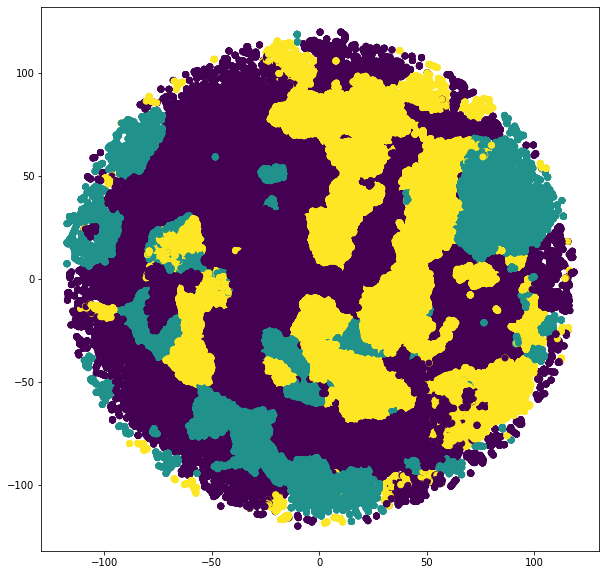

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(merge_x[:,0], merge_x[:,1], c=x_label)
plt.show()